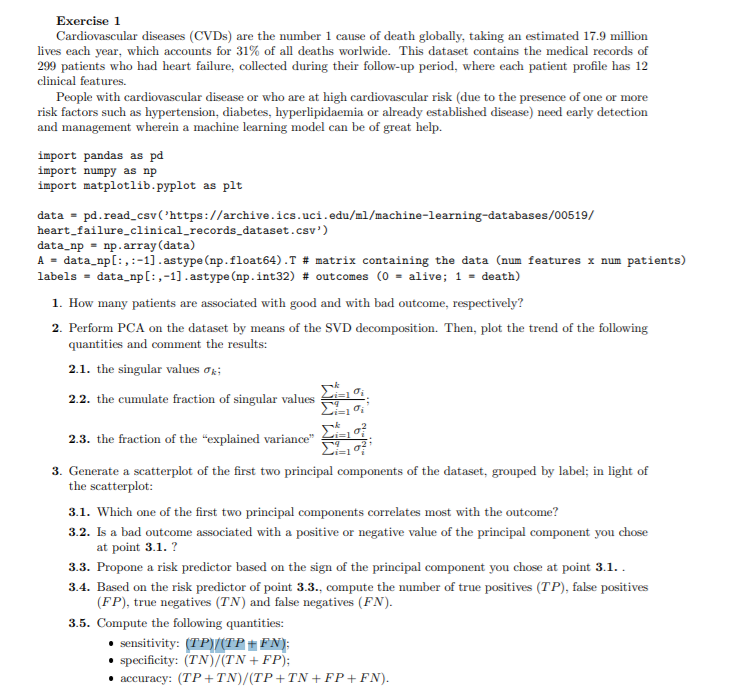

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
data_np = np.array(data)
A = data_np[:,:-1].astype(np.float64).T # matrix containing the data (num features x num patients)
labels = data_np[:,-1].astype(np.int32) # outcomes (0 = alive; 1 = death)

In [52]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [53]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


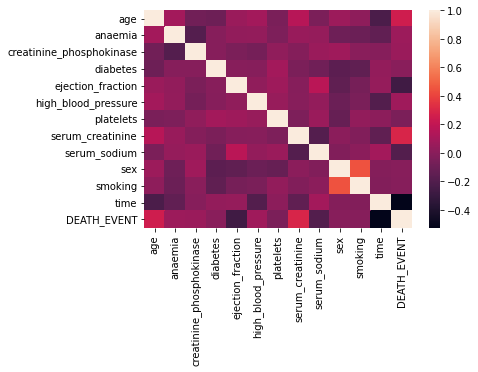

In [55]:
import seaborn as sns
sns.heatmap(data.corr())

In [56]:
# matrix containing the data (num features x num patients)
# outcomes (0 = alive; 1 = death)
A.shape, labels.shape

((12, 299), (299,))

In [57]:
print('Good outcome %d' % np.sum(labels==0))
print('Bad outcome %d' % np.sum(labels==1))

Good outcome 203
Bad outcome 96


In [76]:
A_mean = np.mean(A, axis = 1 )
A_std = np.std(A, axis = 1)
A_ = (A - A_mean[:,None])/A_std[:,None]

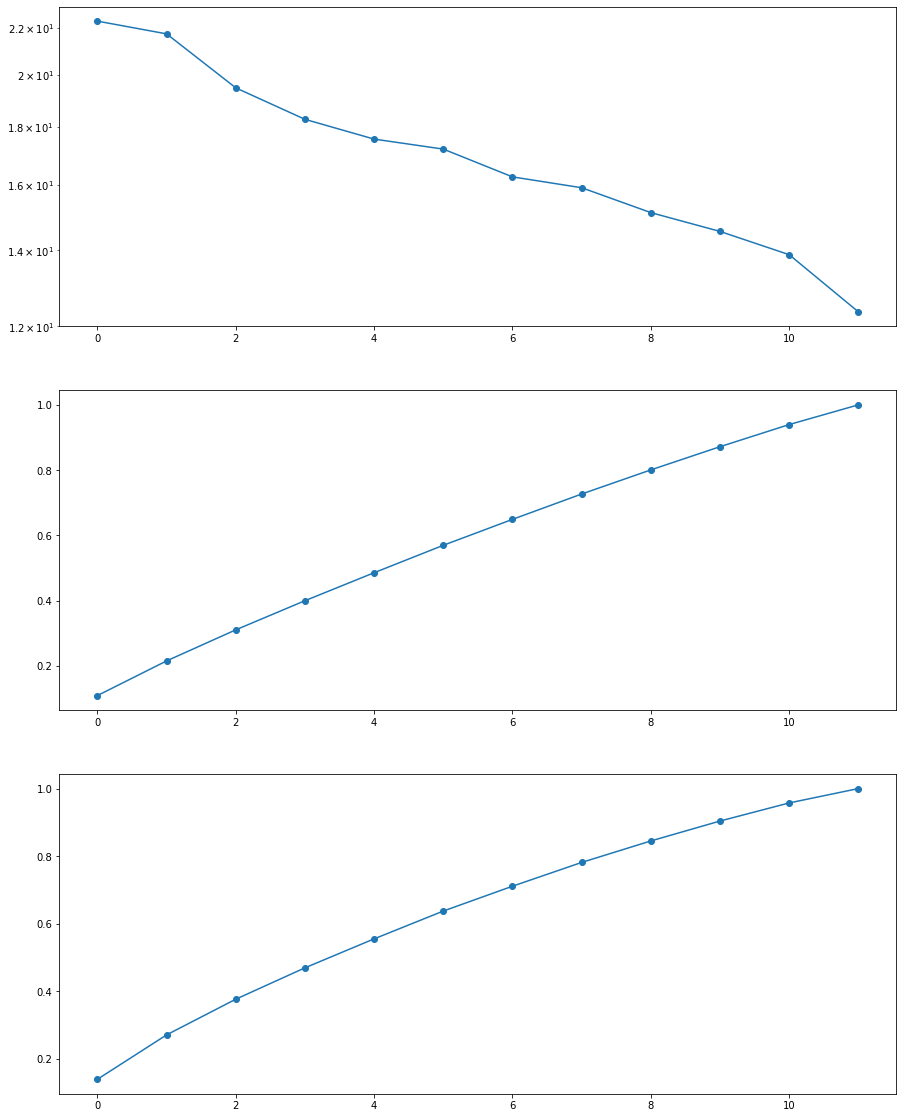

In [77]:
U,s,VT = np.linalg.svd(A_, full_matrices=False)
fig, axs = plt.subplots(3,1, figsize=(15,20))
axs = axs.flatten()
axs[0].semilogy(s,'o-')
axs[1].plot(np.cumsum(s)/np.sum(s),'o-')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2),'o-')

In [78]:
var = (s[0]**2 +s[1]**2)/np.sum(s**2)
var10 = np.sum(s[:10]**2)/np.sum(s**2)
print("Explained variance of first 2 singular values: %1.7f %%"%(var*100))
print("Explained variance of first 10 singular values: %1.7f %%"%(var10*100))

var1 =s[0]**2/np.sum(s**2)
var2 = s[1]**2/np.sum(s**2)
print("Explained variance of first singular value: %1.7f %%"%(var1*100))
print("Explained variance of second singular value: %1.7f %%"%(var2*100))
#we reach the 90% of the explained variance with the first 10 singular values, the first 2 only explain 27% of the total variance

Explained variance of first 2 singular values: 27.0171779 %
Explained variance of first 10 singular values: 90.3781376 %
Explained variance of first singular value: 13.8580485 %
Explained variance of second singular value: 13.1591293 %


In [79]:
Phi = U.T @ A_

Phi.shape

(12, 299)

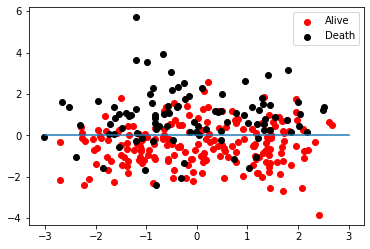

In [83]:
pc1 = Phi[0,:]
pc2 = Phi[1,:]

plt.scatter(pc1[labels==0],pc2[labels==0],label='Alive',color='red')
plt.scatter(pc1[labels==1],pc2[labels==1],label='Death',color='black')
plt.plot([-3,3],[0, 0])
plt.legend()

The second principal component is more correlated with the outcome. Positive value of the component implies bad outcomes, while negative, good outcomes

In [88]:
def classifier(pc,threshold):
  return np.array([0 if pc[i]<=threshold else 1 for i in range(len(pc))])

classifier(pc2,0)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
y_hat = classifier(pc2,0)
TP = np.sum(np.logical_and(y_hat==1, labels==1))
TN = np.sum(np.logical_and(y_hat==0, labels==0))
FP = np.sum(np.logical_and(y_hat==1, labels==0))
FN = np.sum(np.logical_and(y_hat==0, labels==1))
TP, TN, FP, FN

(79, 137, 66, 17)

In [103]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = (TP)/(TP + FN)
specificity = (TN)/(TN+FP) 

print("accuracy: %1.2f" % (accuracy*100))
print("sensitivity: %1.2f" % (sensitivity*100))
print("specificity: %1.2f" % (specificity*100))

accuracy: 72.24
sensitivity: 82.29
specificity: 67.49


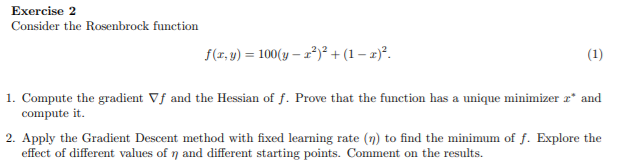

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

In [107]:
f = lambda x,y: 100*(y-x**2)**2 + (1-x)**2
f(1.,1.)

0.0

(1.0001871832668598, 1.0003743676623458)

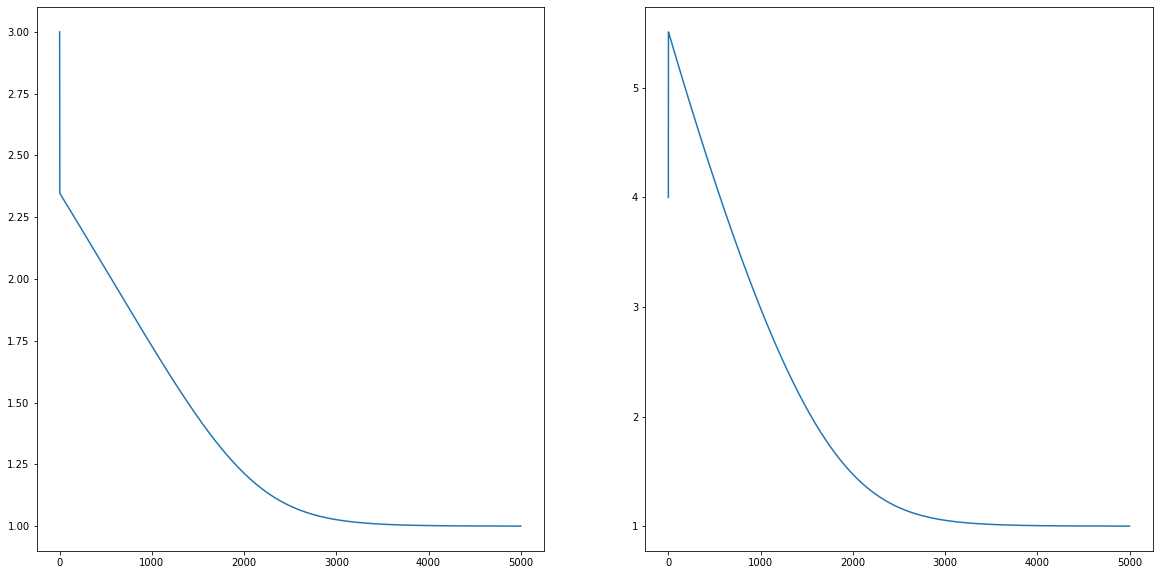

In [113]:
grad_x = jax.jit(jax.grad(f,argnums=0))
grad_y = jax.jit(jax.grad(f,argnums=1))
hess_x = jax.jit(jax.jacfwd(grad_x, argnums = 0))
hess_y = jax.jit(jax.jacfwd(grad_y, argnums = 1))

lr =1e0
epochs = 5000
x0 = 3.
y0 = 4.
hist_x0 = [x0]
hist_y0 = [y0]

for e in range(epochs):
  incrx = np.linalg.solve(np.array([[hess_x(x0,y0)]]),np.array([[-lr*grad_x(x0,y0)]]))
  x0 +=   incrx[0,0]
  incry =  np.linalg.solve(np.array([[hess_y(x0,y0)]]),np.array([[-lr*grad_y(x0,y0)]]))
  y0 +=  incry[0,0]

  hist_x0.append(x0)
  hist_y0.append(y0)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].plot(hist_x0)
ax[1].plot(hist_y0)
x0,y0

(1.0002963542938232, 1.0005937814712524)

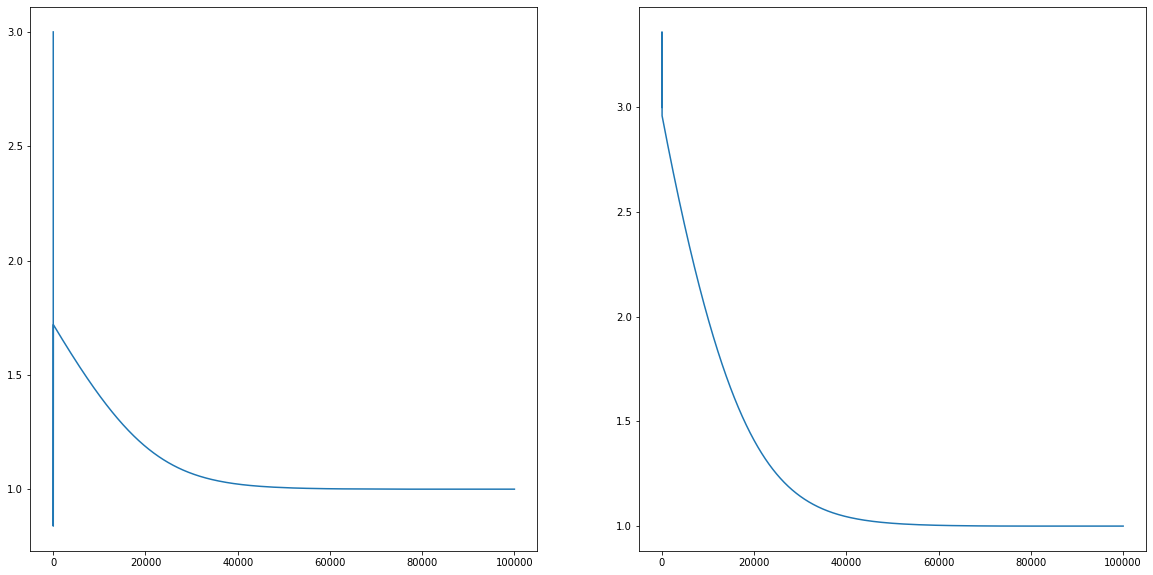

In [114]:
grad_xy= jax.jit(jax.grad(f,argnums=[0,1]))
lr = 3e-4
epochs = 100000
h_x1 = list()
h_y1 = list()
def update_h():
  h_x1.append(x[0])
  h_y1.append(x[1])
x = np.array([3., 3.])
update_h()
for e in range(epochs):
  g = grad_xy(x[0],x[1])
  for i in range(2):
    x[i] -= lr * g[i]
  update_h()

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].plot(h_x1)
ax[1].plot(h_y1)
h_x1[-1],h_y1[-1]

In [115]:
f(x[0],x[1])

8.792290134228838e-08